In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from numpy import concatenate

physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

print(tf.__version__)

2.2.0


In [2]:
df=pd.read_csv("data.csv")
df

,date,dow(USD),euro_stoxx50(USD),nasdaq(USD),nikkei(USD),oro(USD),petroleo(USD),shangai_stock_exchange(USD),sp_500(USD),BCHAIN-TOTBC,BCHAIN-AVBLS,BCHAIN-MIREV (USD),BCHAIN-HRATE,BCHAIN-NTRBL,BCHAIN-NADDU,eur_usd,cny_usd,gbp_usd,BCHAIN-MKPRU (USD)
0,2015-01-15,43.31,3157.360,45.760,17108.700,1392.80,46.250,4.180,1992.670,13727150.00,0.413363,7.614220e+05,3.038322e+05,824.000000,212403.0,1.1631,0.16160,1.51830,218.11
1,2015-01-16,44.79,3202.240,46.290,16864.160,1404.90,48.690,4.180,2019.420,13730725.00,0.382308,7.680090e+05,3.256906e+05,731.000000,219873.0,1.1570,0.16110,1.51510,205.35
2,2015-01-17,44.79,3202.240,46.290,16864.160,1341.95,48.770,4.180,2019.420,13734300.00,0.366155,6.775014e+05,2.994605e+05,633.000000,254267.0,1.1570,0.16110,1.51510,197.12
3,2015-01-18,44.79,3211.570,46.290,16939.225,1279.00,48.850,4.180,2019.420,13738025.00,0.330078,7.891797e+05,3.256906e+05,703.000000,223392.0,1.1588,0.16095,1.51310,211.18
4,2015-01-19,44.46,3220.900,46.120,17014.290,1275.90,47.780,4.180,2020.985,13741900.00,0.343386,8.261971e+05,3.388057e+05,740.000000,197559.0,1.1606,0.16080,1.51110,212.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2172,2020-12-26,54.79,3543.280,128.620,26656.610,1883.20,48.230,4.130,3703.060,18581006.25,1.285844,2.379213e+07,1.336463e+08,2110.423611,662980.0,1.2204,0.15280,1.35480,23715.53
2173,2020-12-27,54.54,3559.345,128.735,26755.320,1881.80,47.925,4.135,3719.210,18581887.50,1.384866,2.372233e+07,1.271496e+08,1999.664234,627843.0,1.2209,0.15285,1.34985,24693.58
2174,2020-12-28,54.29,3575.410,128.850,26854.030,1880.40,47.620,4.140,3735.360,18582762.50,1.303960,2.753362e+07,1.373587e+08,2087.871622,696527.0,1.2214,0.15290,1.34490,26443.21
2175,2020-12-29,54.33,3581.370,129.140,27568.150,1882.90,48.000,4.130,3727.040,18583856.25,1.296632,2.996824e+07,1.479380e+08,1931.143750,717073.0,1.2247,0.15310,1.35000,26246.58


In [3]:
df.iloc[1082]

date                                2018-01-01
dow(USD)                             66.280000
euro_stoxx50(USD)                  3540.655000
nasdaq(USD)                          79.100000
nikkei(USD)                       23125.525000
oro(USD)                           1308.700000
petroleo(USD)                        60.240000
shangai_stock_exchange(USD)           3.580000
sp_500(USD)                        2747.795000
BCHAIN-TOTBC                   16774500.000000
BCHAIN-AVBLS                          1.037057
BCHAIN-MIREV (USD)             35435185.862500
BCHAIN-HRATE                   15177350.249500
BCHAIN-NTRBL                       1781.730061
BCHAIN-NADDU                     678712.000000
eur_usd                               1.201000
cny_usd                               0.153700
gbp_usd                               1.350300
BCHAIN-MKPRU (USD)                14165.575000
Name: 1082, dtype: object

In [4]:
#plt.plot(df.iloc[1900:,0], df.iloc[1900:,-1])

In [5]:
from pandas import DataFrame
from pandas import concat

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg





In [6]:
ventana=2 # Se puede mover 
n_cols=19
values = df.iloc[1082:,1:].values# Desde el primer dia del 2018

scaler = MinMaxScaler(feature_range=(0, 10))
values = scaler.fit_transform(values)

data = series_to_supervised(values, ventana,1 )

In [7]:
data

,var1(t-2),var2(t-2),var3(t-2),var4(t-2),var5(t-2),var6(t-2),var7(t-2),var8(t-2),var9(t-2),var10(t-2),...,var9(t),var10(t),var11(t),var12(t),var13(t),var14(t),var15(t),var16(t),var17(t),var18(t)
2,10.000000,7.806315,0.968643,5.966867,1.200694,8.582076,5.862069,3.407267,0.000000,6.115161,...,0.022580,6.158688,8.494152,0.180962,6.014824,7.261453,8.669599,8.910891,8.030144,4.947446
3,10.000000,8.054361,1.321018,6.294216,2.778485,9.069625,6.689655,3.902507,0.010772,6.179034,...,0.033421,6.402501,8.270977,0.090481,8.752944,8.426239,7.913689,9.059406,7.746232,4.967355
4,10.000000,6.849854,1.046259,4.694952,2.326200,8.647843,5.034483,2.939131,0.022580,6.158688,...,0.045022,6.405727,8.962597,0.161573,8.793144,10.000000,7.157779,9.207921,7.462320,5.028709
5,10.000000,7.313230,1.776622,5.050620,2.328514,8.922308,5.034483,2.862793,0.033421,6.402501,...,0.054896,6.423934,8.735349,0.000000,8.102124,7.766441,5.332600,8.118812,6.529968,5.858045
6,10.000000,7.776606,2.506985,5.406289,2.330827,9.196773,4.241379,2.786456,0.045022,6.405727,...,0.066497,6.292396,10.000000,0.161573,6.750968,7.775789,5.329852,5.866337,6.140904,5.918973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,7.405149,7.824059,8.655697,9.183138,7.846154,7.528937,9.379310,9.784373,9.969721,8.227781,...,9.979388,8.627316,4.517538,8.073400,6.618370,4.738985,8.317757,6.683168,7.230985,8.605222
1091,7.405149,7.824059,8.655697,9.172480,7.846154,7.528937,9.655172,9.784373,9.974554,8.468397,...,9.984256,9.627197,4.500976,7.636017,6.044014,4.267089,8.345245,6.707921,7.057483,9.015971
1092,7.405149,7.824059,8.655697,9.172480,7.846154,7.528937,9.655172,9.784373,9.979388,8.627316,...,9.989090,8.810239,5.405210,8.323334,6.501424,5.189527,8.372732,6.732673,6.883982,9.750758
1093,7.348690,7.932653,8.673549,9.262091,7.829960,7.502192,9.689655,9.892187,9.984256,9.627197,...,9.995132,8.736246,5.982826,9.035579,5.688694,5.465463,8.554151,6.831683,7.062741,9.668180


In [8]:
entrenamiento=800
n_obs=ventana*n_cols

train=data.iloc[:entrenamiento,:]
test =data.iloc[entrenamiento:,:]

train_X, train_y = train.iloc[:, :n_obs].values, train.iloc[:, -1].values
test_X, test_y = test.iloc[:, :n_obs].values, test.iloc[:, -1].values

print(train_X.shape, train_y.shape)
print(test_X.shape, test_y.shape)

(800, 38) (800,)
(293, 38) (293,)


In [9]:
train_X = train_X.reshape((train_X.shape[0], ventana, n_cols))
test_X = test_X.reshape((test_X.shape[0], ventana, n_cols))

In [10]:
test_X.shape

(293, 2, 19)

In [11]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential([
   tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                       strides=1, padding="causal",
                       activation="relu",
                       input_shape=[train_X.shape[1],train_X.shape[2]]),
   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(40,activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 500.0)# se puede mover entre 500 a unos 2000
])


model.compile(loss=tf.keras.losses.Huber(), optimizer=tf.keras.optimizers.Adam(learning_rate=1e-6),metrics=["mae"])
history = model.fit(train_X,train_y,shuffle=False,validation_data=(test_X,test_y),epochs=1000)# epocas se pueden mover, ver la grafica del trainning

_loss: 1.7046 - val_mae: 2.1536
Epoch 852/1000
25/25 [==============================] - 0s 6ms/step - loss: 3.5619 - mae: 4.0334 - val_loss: 1.6992 - val_mae: 2.1479
Epoch 853/1000
25/25 [==============================] - 0s 5ms/step - loss: 3.5043 - mae: 3.9742 - val_loss: 1.6829 - val_mae: 2.1316
Epoch 854/1000
25/25 [==============================] - 0s 5ms/step - loss: 3.4296 - mae: 3.9024 - val_loss: 1.6718 - val_mae: 2.1203
Epoch 855/1000
25/25 [==============================] - 0s 5ms/step - loss: 3.5077 - mae: 3.9745 - val_loss: 1.6900 - val_mae: 2.1384
Epoch 856/1000
25/25 [==============================] - 0s 5ms/step - loss: 3.4163 - mae: 3.8904 - val_loss: 1.7168 - val_mae: 2.1657
Epoch 857/1000
25/25 [==============================] - 0s 5ms/step - loss: 3.4076 - mae: 3.8758 - val_loss: 1.7451 - val_mae: 2.1952
Epoch 858/1000
25/25 [==============================] - 0s 6ms/step - loss: 3.4912 - mae: 3.9664 - val_loss: 1.7529 - val_mae: 2.2033
Epoch 859/1000
25/25 [========

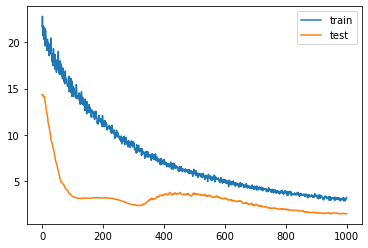

In [12]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [13]:
y_pred=model.predict(test_X)

(200.0, 300.0, -5.0, 20.0)

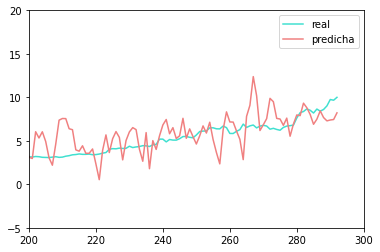

In [14]:
plt.plot(test_y, color="turquoise",label="real")
plt.plot(y_pred, color="lightcoral",label="predicha")
plt.legend()
plt.axis([200,300,-5,20])

In [15]:
y_pred=model.predict(train_X)

(400.0, 600.0, -5.0, 10.0)

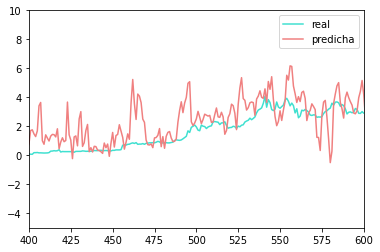

In [16]:
plt.plot(train_y, color="turquoise",label="real")
plt.plot(y_pred, color="lightcoral",label="predicha")
plt.legend()
plt.axis([400,600,-5,10])

In [17]:
    # make a prediction
    # yhat = model.predict(test_X)
    # test_X = test_X.reshape((test_X.shape[0], ventana*n_cols))
    # invert scaling for forecast
    # inv_yhat = concatenate((yhat, test_X[:, -19:]), axis=1)
    # inv_yhat = scaler.inverse_transform(inv_yhat)
    # inv_yhat = inv_yhat[:,0]
    # invert scaling for actual
    # test_y = test_y.reshape((len(test_y), 1))
    # inv_y = concatenate((test_y, test_X[:, -18:]), axis=1)
    # inv_y = scaler.inverse_transform(inv_y)
    # inv_y = inv_y[:,0]
